In [2]:
!pip install scikit-fda FDApy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 83.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 3.2 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import skfda
import matplotlib.pyplot as plt
import FDApy

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
HPI_NSA = pd.read_csv("/content/drive/MyDrive/MURL Project/Non-Seasonally Adjusted Housing Price Index.csv")
HPI_SA = pd.read_csv("/content/drive/MyDrive/MURL Project/Seasonally Adjusted Housing Price Index.csv")

In [6]:
HPI_NSA.head()

,Month,East North Central,East South Central,Middle Atlantic,Mountain,New England,Pacific,South Atlantic,West North Central,West South Central,USA
0,1991-01-01,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
1,1991-02-01,100.89,100.99,100.15,98.39,101.77,100.13,100.58,100.49,99.82,100.39
2,1991-03-01,101.30,100.85,100.10,100.21,101.52,99.96,101.00,100.43,100.62,100.68
3,1991-04-01,101.69,100.83,99.60,100.30,101.04,100.14,100.90,100.83,100.36,100.68
4,1991-05-01,102.30,101.14,99.72,100.70,99.83,100.34,100.77,100.80,100.76,100.84


In [7]:
HPI_SA.head()

,Month,East North Central,East South Central,Middle Atlantic,Mountain,New England,Pacific,South Atlantic,West North Central,West South Central,USA
0,1991-01-01,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
1,1991-02-01,100.94,100.63,100.32,98.75,102.38,100.57,100.47,100.45,99.59,100.45
2,1991-03-01,100.90,100.43,99.82,100.63,101.36,100.13,100.60,100.13,100.49,100.48
3,1991-04-01,100.97,100.47,99.28,100.38,101.06,100.12,100.40,100.36,100.08,100.33
4,1991-05-01,101.32,100.76,99.24,100.49,99.85,100.10,100.46,100.32,100.27,100.38


## Plotting plain data

In [8]:
HPI_SA_T = HPI_SA.T.drop('Month')
HPI_NSA_T = HPI_NSA.T.drop('Month')

regions = HPI_SA_T.index

grid_points = np.arange(0,len(HPI_SA.index))
data_matrixSA = HPI_SA_T.to_numpy().astype(np.float64)
data_matrixNSA = HPI_NSA_T.to_numpy().astype(np.float64)

data_matrixSA

fdSA = skfda.FDataGrid(data_matrix = data_matrixSA, grid_points = grid_points)
fdNSA = skfda.FDataGrid(data_matrix = data_matrixNSA, grid_points = grid_points)

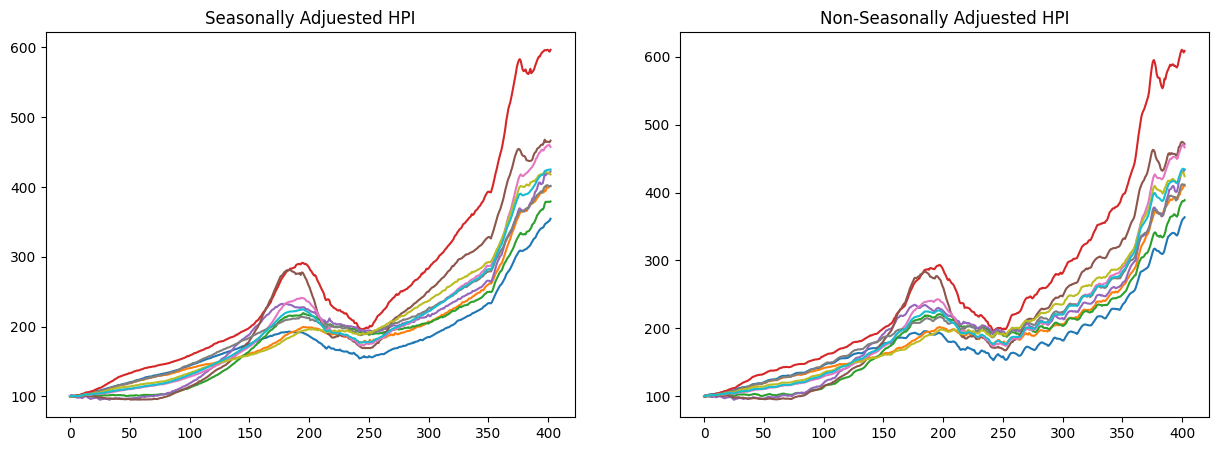

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

fdSA.plot(axes = axes[0])
axes[0].set_title(r"Seasonally Adjuested HPI")
fdNSA.plot(axes = axes[1])
axes[1].set_title(r"Non-Seasonally Adjuested HPI")

plt.show()

## Comparing different basis representations

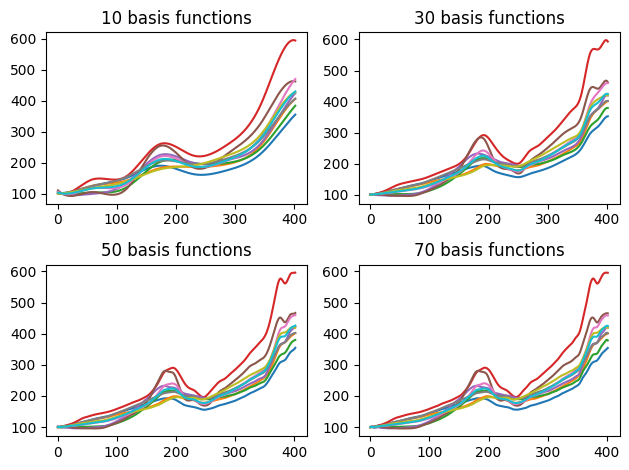

In [10]:
fig, axes = plt.subplots(2, 2)

index = 0
for n_basis in range (10, 71, 20):
  basis = skfda.representation.basis.BSplineBasis(n_basis = n_basis)
  SA_basis = fdSA.to_basis(basis)

  ax = axes.ravel()[[0,1,2,3][index]]
  fig = SA_basis.plot(axes = ax)
  ax.set_title(f"{n_basis} basis functions")

  fig.tight_layout()
  fig.show()
  index += 1


Text(0.5, 1.0, 'SA HPI as 60 basis functions')

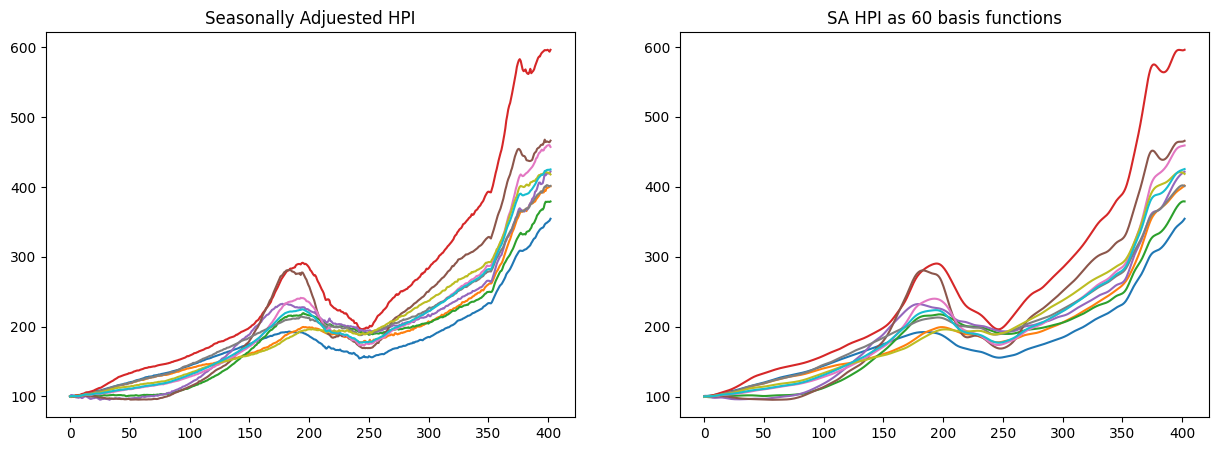

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

fdSA.plot(axes = axes[0])
axes[0].set_title(r"Seasonally Adjuested HPI")

n_basis = 60
basis = skfda.representation.basis.BSplineBasis(n_basis = n_basis)
SA_basis = fdSA.to_basis(basis)
SA_basis.plot(axes = axes[1])
axes[1].set_title(f"SA HPI as {n_basis} basis functions")

## Functional data exploration

### Mean

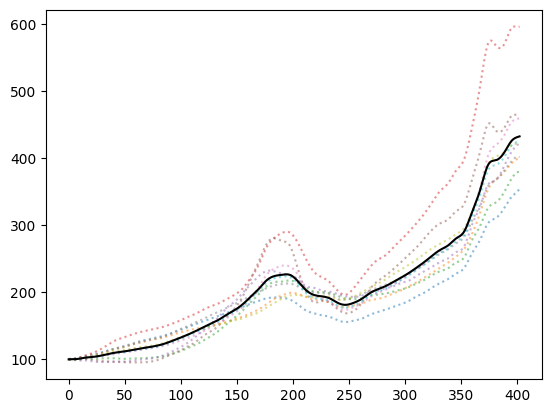

In [12]:
fig, ax = plt.subplots()

meanSA = skfda.exploratory.stats.mean(SA_basis)

SA_basis.plot(linestyle = 'dotted', alpha = 0.5, axes = ax)
meanSA.plot(color = 'black', axes = ax)

plt.show()

### Derivatives

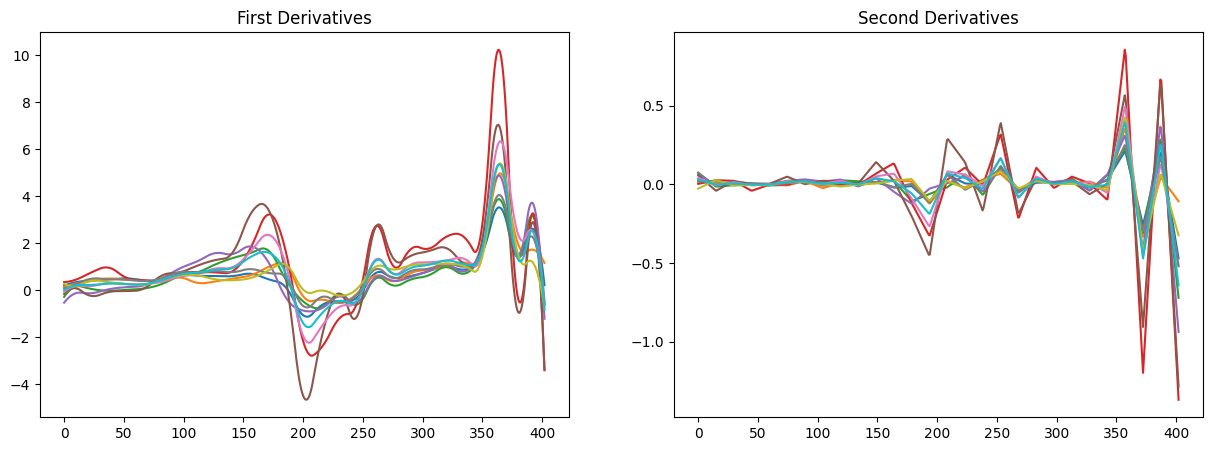

In [13]:
#Uses a smaller n_basis so the derivative plot is more readable

basis = skfda.representation.basis.BSplineBasis(n_basis = 30)
SA_smaller_basis = fdSA.to_basis(basis)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

fdaSAderivative = SA_smaller_basis.derivative()
fdaSAderivative.plot(axes[0])
axes[0].set_title("First Derivatives")

fdaSAsecondderivative = SA_smaller_basis.derivative(order = 2)
fdaSAsecondderivative.plot(axes[1])
axes[1].set_title("Second Derivatives")

plt.show()


### Functional Principal Component Analysis

In [14]:
from skfda.exploratory.visualization import FPCAPlot
from skfda.preprocessing.dim_reduction import FPCA

In [15]:
fpca10 = FPCA(n_components = 10)
fpca10.fit(SA_basis)
prop_var = fpca10.explained_variance_ratio_

for i in range(1, 11):
  print(f"{i}-th component explained variance: {prop_var[i - 1]}")


1-th component explained variance: 0.879919353165267
2-th component explained variance: 0.06308179441364306
3-th component explained variance: 0.025009788278355944
4-th component explained variance: 0.018725785902938198
5-th component explained variance: 0.010336240378505588
6-th component explained variance: 0.0023461136115815145
7-th component explained variance: 0.0004666451564348553
8-th component explained variance: 0.00011126604192391446
9-th component explained variance: 3.0130513499955547e-06
10-th component explained variance: 1.4806489514980237e-33


In [16]:
prop_var

array([8.79919353e-01, 6.30817944e-02, 2.50097883e-02, 1.87257859e-02,
       1.03362404e-02, 2.34611361e-03, 4.66645156e-04, 1.11266042e-04,
       3.01305135e-06, 1.48064895e-33])

In [17]:
for i in range(1, 11):
  print(f"First {i} components cumulative explained variance: {np.cumsum(prop_var)[i - 1]}")

First 1 components cumulative explained variance: 0.879919353165267
First 2 components cumulative explained variance: 0.9430011475789101
First 3 components cumulative explained variance: 0.968010935857266
First 4 components cumulative explained variance: 0.9867367217602042
First 5 components cumulative explained variance: 0.9970729621387098
First 6 components cumulative explained variance: 0.9994190757502913
First 7 components cumulative explained variance: 0.9998857209067262
First 8 components cumulative explained variance: 0.9999969869486501
First 9 components cumulative explained variance: 1.0000000000000002
First 10 components cumulative explained variance: 1.0000000000000002


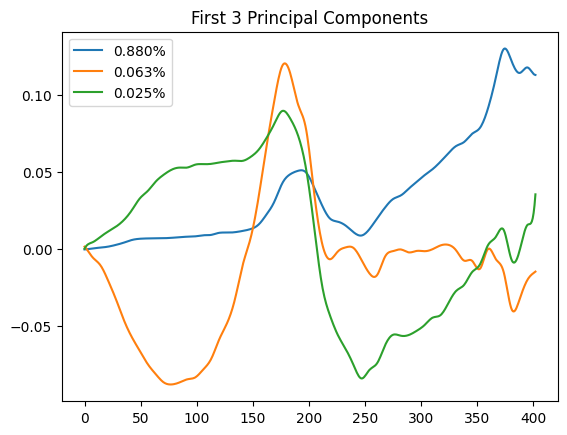

In [18]:
fig, ax = plt.subplots()

fpca = FPCA(n_components = 3)
fpca.fit(SA_basis)

fpca.components_.plot(axes = ax)
ax.set_title("First 3 Principal Components")

ax.legend(["{:.3f}%".format(fpca.explained_variance_ratio_[0]),
          "{:.3f}%".format(fpca.explained_variance_ratio_[1]),
          "{:.3f}%".format(fpca.explained_variance_ratio_[2])])

plt.show()